In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame = pd.read_excel('merc.xlsx')

In [3]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
 ##checking for the null's
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

D:\pitOan\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

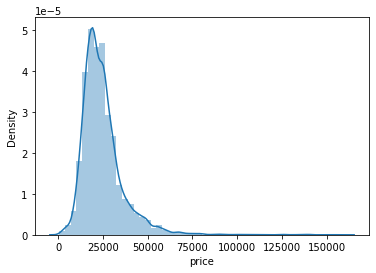

In [6]:
##examine the distribution with distplot method
sbn.distplot(dataFrame["price"])

D:\pitOan\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

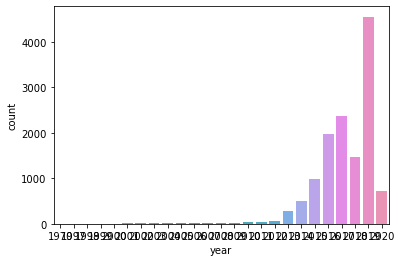

In [7]:
#checking the data's topicality with countplot method
sbn.countplot(dataFrame['year'])

In [8]:
##Due to the analysis is mainly based on prices,
##correletion is examined for prices and sorted.
##a higher value gives a higher degree of contextual relevance.
dataFrame.corr()['price'].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

In [9]:
## the most expensive cars may affect negatively 
## the accuracy of the analysis. Thus, they may be neglected (optional)
## to examinethe top 20 in expensivity, head func is used.
dataFrame.sort_values('price',ascending = False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [10]:
## as can be seen with the distplot graph,
## the peak of the graph is in the middle, 
## with the highest priced cars in very little quantity.

## we have totally 13119 cars so within the neglecting the 1% of them
## analysis accuracy will not be changed. 
## Thus, we will ignore the 131 of the most expensive ones. 

In [11]:
## for ignoring the data without deleting, this method will be useful. 
df99perc = dataFrame.sort_values('price',ascending = False).iloc[131:]

D:\pitOan\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

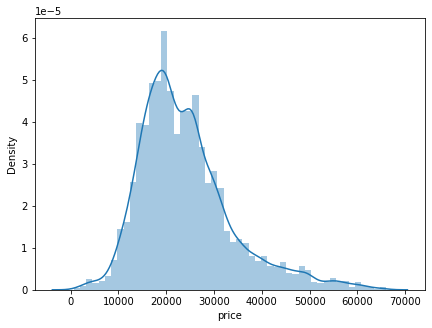

In [12]:
## when distplot grap is examined, 
## it can be clearly seen a more smooth graph.
plt.figure(figsize=(7,5))
sbn.distplot(df99perc['price'])

In [13]:
## new data's examination according to the year value.
df99perc.groupby('year').mean()['price']

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [14]:
## as can see with the previos part, 1970 year is not normal
## against all the dist. So, we may neglect that these too. (optional ofc.)

In [15]:
df99perc = df99perc[df99perc.year != 1970]

In [16]:
# to examination after neglecting the 1970
df99perc.groupby('year').mean()['price']

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [17]:
## for further movement, the transmission part in data will be deleted. 
## because texts can not be used as like nums. 
df99perc = df99perc.drop('transmission', axis = 1)

In [18]:
y = df99perc['price'].values
x = df99perc.drop('price',axis =1).values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=10)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
model = Sequential()

#all layers
model.add(Dense(12,activation="relu",))
model.add(Dense(12,activation="relu",))
model.add(Dense(12,activation="relu",))
model.add(Dense(12,activation="relu",))

model.add(Dense(1)) #output layer
model.compile(optimizer ="adam", loss = "mse")


In [26]:
## to avoid inserting all the data we use batches.
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
37/37 [==============================] - 1s 5ms/step - loss: 672149952.0000 - val_loss: 688111360.0000
Epoch 2/300
37/37 [==============================] - 0s 1ms/step - loss: 672140672.0000 - val_loss: 688097728.0000
Epoch 3/300
37/37 [==============================] - 0s 1ms/step - loss: 672111168.0000 - val_loss: 688038912.0000
Epoch 4/300
37/37 [==============================] - 0s 1ms/step - loss: 672000256.0000 - val_loss: 687835520.0000
Epoch 5/300
37/37 [==============================] - 0s 1ms/step - loss: 671614848.0000 - val_loss: 687145664.0000
Epoch 6/300
37/37 [==============================] - 0s 1ms/step - loss: 670442944.0000 - val_loss: 685219392.0000
Epoch 7/300
37/37 [==============================] - 0s 1ms/step - loss: 667474752.0000 - val_loss: 680637248.0000
Epoch 8/300
37/37 [==============================] - 0s 1ms/step - loss: 660770752.0000 - val_loss: 670807104.0000
Epoch 9/300
37/37 [==============================] - 0s 1ms/step - loss: 6475195

37/37 [==============================] - 0s 1ms/step - loss: 59965604.0000 - val_loss: 58031144.0000
Epoch 73/300
37/37 [==============================] - 0s 1ms/step - loss: 59331108.0000 - val_loss: 57371696.0000
Epoch 74/300
37/37 [==============================] - 0s 1ms/step - loss: 58694000.0000 - val_loss: 56607692.0000
Epoch 75/300
37/37 [==============================] - 0s 1ms/step - loss: 58040364.0000 - val_loss: 56014048.0000
Epoch 76/300
37/37 [==============================] - 0s 1ms/step - loss: 57384308.0000 - val_loss: 55314264.0000
Epoch 77/300
37/37 [==============================] - 0s 1ms/step - loss: 56710572.0000 - val_loss: 54575008.0000
Epoch 78/300
37/37 [==============================] - 0s 1ms/step - loss: 56034076.0000 - val_loss: 53734652.0000
Epoch 79/300
37/37 [==============================] - 0s 1ms/step - loss: 55366632.0000 - val_loss: 53032108.0000
Epoch 80/300
37/37 [==============================] - 0s 1ms/step - loss: 54654956.0000 - val_loss: 5

37/37 [==============================] - 0s 1ms/step - loss: 22569498.0000 - val_loss: 26994268.0000
Epoch 144/300
37/37 [==============================] - 0s 1ms/step - loss: 22499728.0000 - val_loss: 27028124.0000
Epoch 145/300
37/37 [==============================] - 0s 1ms/step - loss: 22439302.0000 - val_loss: 27049932.0000
Epoch 146/300
37/37 [==============================] - 0s 1ms/step - loss: 22370464.0000 - val_loss: 27197288.0000
Epoch 147/300
37/37 [==============================] - 0s 1ms/step - loss: 22344580.0000 - val_loss: 27033600.0000
Epoch 148/300
37/37 [==============================] - 0s 1ms/step - loss: 22298450.0000 - val_loss: 27323256.0000
Epoch 149/300
37/37 [==============================] - 0s 1ms/step - loss: 22231742.0000 - val_loss: 26629066.0000
Epoch 150/300
37/37 [==============================] - 0s 1ms/step - loss: 22147864.0000 - val_loss: 26370218.0000
Epoch 151/300
37/37 [==============================] - 0s 1ms/step - loss: 22112902.0000 - val

37/37 [==============================] - 0s 1ms/step - loss: 20283158.0000 - val_loss: 24406878.0000
Epoch 215/300
37/37 [==============================] - 0s 1ms/step - loss: 20274976.0000 - val_loss: 24631424.0000
Epoch 216/300
37/37 [==============================] - 0s 1ms/step - loss: 20255818.0000 - val_loss: 24259394.0000
Epoch 217/300
37/37 [==============================] - 0s 1ms/step - loss: 20239480.0000 - val_loss: 24188972.0000
Epoch 218/300
37/37 [==============================] - 0s 1ms/step - loss: 20263984.0000 - val_loss: 24236372.0000
Epoch 219/300
37/37 [==============================] - 0s 1ms/step - loss: 20195086.0000 - val_loss: 24032836.0000
Epoch 220/300
37/37 [==============================] - 0s 1ms/step - loss: 20211108.0000 - val_loss: 24349786.0000
Epoch 221/300
37/37 [==============================] - 0s 1ms/step - loss: 20168128.0000 - val_loss: 24130532.0000
Epoch 222/300
37/37 [==============================] - 0s 1ms/step - loss: 20157310.0000 - val

37/37 [==============================] - 0s 1ms/step - loss: 19194866.0000 - val_loss: 23112540.0000
Epoch 286/300
37/37 [==============================] - 0s 1ms/step - loss: 19176484.0000 - val_loss: 22741714.0000
Epoch 287/300
37/37 [==============================] - 0s 1ms/step - loss: 19167008.0000 - val_loss: 23227588.0000
Epoch 288/300
37/37 [==============================] - 0s 1ms/step - loss: 19146058.0000 - val_loss: 23051922.0000
Epoch 289/300
37/37 [==============================] - 0s 1ms/step - loss: 19131120.0000 - val_loss: 22664084.0000
Epoch 290/300
37/37 [==============================] - 0s 1ms/step - loss: 19136514.0000 - val_loss: 22814606.0000
Epoch 291/300
37/37 [==============================] - 0s 1ms/step - loss: 19109844.0000 - val_loss: 22844266.0000
Epoch 292/300
37/37 [==============================] - 0s 1ms/step - loss: 19102734.0000 - val_loss: 22973718.0000
Epoch 293/300
37/37 [==============================] - 0s 1ms/step - loss: 19069532.0000 - val

In [29]:
lossData = pd.DataFrame(model.history.history)

<AxesSubplot:>

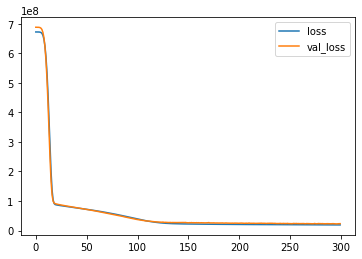

In [30]:
lossData.plot() ##it is import to not overfit. So the loss and the vall_loss
                ## must follow the nearly same paths. 

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
predictMerc = model.predict(x_test)

In [34]:
mean_absolute_error(y_test,predictMerc)

3417.9024182702137

In [ ]:
## so there is a difference of 3417 pound in prediction. (13%)

In [ ]:
## for reduce the difference, data may be cleaned more, 
## layers may be increased
## neurons may be incresed, Epoch may be increased. 


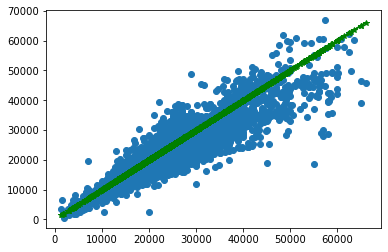

In [36]:
## with more detailed examination,the line goes through nearly middle of 
## the all graph, thus, the prediction may useful,
## yet, useful is a relative term that depends on requirements. 
plt.scatter(y_test,predictMerc)
plt.plot(y_test,y_test,"g-*")